# Final Project Report

* Class: DS 5100
* Student Name: Samantha Asefi
* Student Net ID: sma9am
* This URL: https://github.com/smasefi/MonteCarloSimulator/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/smasefi/MonteCarloSimulator

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [7]:
```
#die.py
import numpy as np
import pandas as pd

class Die:
    '''
    This class is representative of a die object. It contains 4 methods. The die method replicates 
    the behavior of a dice.

    1. __init__: This method initializes the die object with a list of faces and an optional weight.
    2. change_weight: This method allows the user to change the weight of a specific face on the die.
    3. roll: This method simulates rolling the die a specified number of times and returns the results.
    4. currState: This method returns the current state of the die, including the faces and their weights.
    '''

    def __init__(self, faces, weight=None):
        '''
        This method initializes the die object with a list of faces and an optional weight. It replicates
        what a die would look like by taking in a list of integers or strings and an optional weight. The weight
        would change the likelihood that a particular face is chosen. Creates a private die data frame.

        :param faces: list of integers or strings
        :param weight: list of floats (optional)
        :return: None
        '''
        # check to make sure the type is a numpy array
        if not isinstance(faces, np.ndarray):
            raise TypeError("faces must be a numpy array")
        
        # check to make sure the array's data type is a string or int
        if not (np.issubdtype(faces.dtype, np.integer) or np.issubdtype(faces.dtype, np.str_)):
            raise TypeError("faces must be a list of integers or strings")
        
        # check if array values are unique
        if len(faces) != len(np.unique(faces)):
            raise ValueError("faces must be unique")
        
        # set weight to be an array of ones
        weight = [1.0]*len(faces)
        # save both face and weight to a private data frame
        self._die = pd.DataFrame(
            {
                'weight': weight
            }, index=faces
        )


    def change_weight(self, face, weight):
        '''
        This method allows the user to change the weight of a specific face on the die. Based on the 
        position of the face, a user of this game is able to change or alter the specific weights.
        :param face: integer or string of face value
        :param weight: float
        :return: None
        '''
        # check to see if face is in the die
        if face not in self._die.index:
            raise IndexError("face not in die")
        
        # Checks to see if the weight is a valid type, i.e. if it is numeric
        #(integer or float) or castable as numeric. If not, raises a
        #`TypeError`.
        #if weight != int(weight) or weight != float(weight):
            #raise TypeError("weight must be a float or an int")
        if not isinstance(weight, (int, float)):
            raise TypeError("weight must be a float or an int")
        # check to make sure weight is positive or greater than zero
        if weight < 0:
            raise ValueError("weight must be equal to 0 or positive")
        
        # TODO: need to write code to change the weight for alloted face
        self._die.loc[face, 'weight'] = weight
        # Updated the weight for the specified face

    def roll(self, n=1):
        '''
        This method simulates rolling the die a specified number of times and returns the results of the roll.
        The default number of rolls is one, so if nothing is passed in, it will roll once. 
        :param n: integer value for number of rolls
        :return: list of outcomes
        '''
        # TODO: random sample with replacement from private data frame that applies weights
        rolls = np.random.choice(self._die.index, size=n, p=self._die['weight']/self._die['weight'].sum())
        # TODO: Returns list of outcomes
        rolls = rolls.tolist()
        return rolls

    def currState(self):
        '''
        This method returns the current state of the die, including the faces and their weights. It just returns a 
        copy in the event that the user wants to change the die state. The copy is a deep copy, so it won't affect the original.
        :param: None
        :return: private DataFrame of die state
        '''
        #TODO: Returns the current state of the die
        return self._die.copy()

```
```
#game.py
import numpy as np
import pandas as pd
from montecarlosimulator.die import Die

class Game:
    '''
    This class is representative of what a game of dice would consist of and has 3 methods. Takes the 
    die objects and has the actions that would be taken by a game. This class has methods that exhibit
    behaviors of a game. 

    1. __init__: This method initializes the game object with a list of die objects.
    2. play: This method simulates rolling the dice a specified number of times and returns the results.
    3. show: This method returns the results of the game in either wide or narrow format depending on what
    is being entered.
    '''
    def __init__(self, dice):
        '''
        This method initializes the game object with a list of die objects.
        :param dice: list of Die objects
        :return: None
        '''
        # each dice has a face and weight association via the die object --> this is a list of dice
        #TODO: checks to make sure they all have the same number of faces

        #TODO: checks list to make sure it contains Die objects
        self.dice = dice
        self._game_results = None

    def play(self, num_rolls):
        '''
        This method takes in the number of rolls that should be played on a set of dice
        and saves the results of the rolls in a private data frame.

        :param num_rolls: integer
        :return: None
        '''
        #TODO: take the integer and call the roll method
        results = {}
        for i, die in enumerate(self.dice):
            # add the roll results into the results frame
            results[i] = [die.roll()[0] for _ in range(num_rolls)]
        # should be in wide format
        #TODO: Save results to a private data frame
        self._game_results = pd.DataFrame(results) 
        self._game_results.index.name = 'roll' # make sure the index is the roll number
        self._game_results.unstack() # ensure that it is wide format

    def show(self, format='wide'):
        '''
        The show method returns the game results in either wide or narrow format depending on 
        what it is passed as an argument. The default is wide.

        :param format: 'wide' or 'narrow'
        :return: private DataFrame of game results
        '''
        if format == 'wide':
            return self._game_results.copy()
        elif format == 'narrow':
            narrow = self._game_results.stack()
            narrow.index.names = ['roll', 'die']
            return narrow
        else:
            raise ValueError("format must be either wide or narrow")
```
```
#analyzer.py
import numpy as np
import pandas as pd
from montecarlosimulator.game import Game

class Analyzer:
    '''
    This class is the analyzer class and contains 5 methods. This class takes the results of a single game
    and computes various descriptive statistical properties to talk about.

    1. __init__: Takes the game object as a parameter and will have an error if it is not the game 
    object
    2. jackpot: This method counts the number of times a jackpot occurs in the game results.
    3. face_counts_per_roll: This method counts the number of times each face appears in each roll.
    4. combination_counts: This method counts the number of times each combination of faces appears in the game results.
    5. permutation_counts: This method counts the number of times each permutation of faces appears in the game results.
    '''

    def __init__(self, gameval):
        '''
        This method initializes the analyzer object with a game object. 
        :param gameval: Game object
        :return: Value Error if the gameval is not a game object
        :return: None
        '''
        if not isinstance(gameval, Game):
            return ValueError("gameval must be a Game object")
        self.gameval = gameval
        self._game_results = gameval.show(format='wide')

    def jackpot(self):
        '''
        This method counts the number of times a jackpot occurs in the game results.
        :return: integer for the number of jackpots
        '''
        jackpot_count = 0
        for i in range(len(self._game_results)):
            if len(set(self._game_results.iloc[i])) == 1: #sets check if the values are unique
                jackpot_count += 1
        return jackpot_count    
    
    def face_counts_per_roll(self):
        '''
        This method counts the number of times each face appears in each roll. Computes how many times a given face
        is rolled for each roll.
        :return: DataFrame of face counts
        '''
        counts = self._game_results.apply(pd.Series.value_counts, axis=1) # go down df
        # make sure this is formatted wide in testing
        return counts
    
    #order does not matter of the faces that show per roll
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html
    def combination_counts(self):
        '''
        This method computes the number of distinct combinations that appear within a roll, along with 
        their counts. A combination isn't privvy to order, so it doesn't matter what the order of 
        the given faces are within a roll.
        :param game: None
        :return: DataFrame of combination counts
        '''
        counts = {}
        for index, row in self._game_results.iterrows():
            combination = tuple(sorted(row))
            if combination in counts:
                counts[combination] += 1
            else:
                counts[combination] = 1
        combinations = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])
        combinations.index.name = 'combination'
        return combinations
    
    # order does matter of the faces that show per roll
    def permutation_counts(self):
        '''
        This method computes the number of distinct permutations that appear within a roll, along with
        their counts. A permutation is privvy to order, so it does matter what the order of
        the given faces are within a roll.
        :param game: None
        :return: DataFrame of permutation counts
        '''
        counts = {}
        for index, row in self._game_results.iterrows():
            permutations = tuple(row)
            if permutations in counts:
                counts[permutations] += 1
            else:
                counts[permutations] = 1
        perm = pd.DataFrame.from_dict(counts, orient='index', columns=['count'])
        perm.index.name = 'permutation'
        return perm

```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [2]:
```
import unittest
import numpy as np
import pandas as pd
from montecarlosimulator.die import Die
from montecarlosimulator.game import Game
from montecarlosimulator.analyzer import Analyzer

class TestDie(unittest.TestCase):
    def test_init_valid(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        self.assertIsInstance(die, Die)
    
    def test_change_weight(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        die.change_weight(1, 2.0)
        self.assertEqual(die.currState().loc[1, 'weight'], 2.0)
    
    def test_change_weight_invalid_value(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        with self.assertRaises(ValueError):
            die.change_weight(1, -1.0)

    def test_change_weight_invalid_type(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        with self.assertRaises(TypeError):
            die.change_weight(1, "invalid_weight")
    
    def test_roll_length(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        rolls = die.roll(10)
        self.assertEqual(len(rolls), 10)
    
    def test_currState(self):
        die = Die(np.array([1, 2, 3, 4, 5, 6]))
        state = die.currState()
        self.assertIsInstance(state, pd.DataFrame)
        self.assertEqual(state.shape, (6, 1))
    


class TestGame(unittest.TestCase):
    def test_init(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        self.game = Game([die1, die2])
        self.assertIsInstance(self.game, Game)
        self.assertEqual(len(self.game.dice), 2)
        self.assertIsInstance(self.game.dice[0], Die)
    
    def test_play(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        self.game = Game([die1, die2])
        self.game.play(10)
        self.assertEqual(len(self.game._game_results), 10)
        self.assertEqual(len(self.game._game_results.columns), 2)

    # test to ensure wide data frame
    def test_wide_frame(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        self.game = Game([die1, die2])
        self.game.play(10)
        wide_df = self.game.show(format='wide')
        self.assertEqual(wide_df.index.name, 'roll')
        self.assertEqual(len(wide_df.columns), 2)

    def test_narrow_frame(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        self.game = Game([die1, die2])
        self.game.play(10)
        narrow_df = self.game.show(format='narrow')
        self.assertEqual(narrow_df.index.names, ['roll', 'die'])
    
    def test_play(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        self.game = Game([die1, die2])
        self.game.play(10)  
        self.assertIsInstance(self.game._game_results, pd.DataFrame)
        self.assertEqual(self.game._game_results.shape, (10, 2))

    def test_show(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        self.game = Game([die1, die2])
        self.game.play(10)
        wide_df = self.game.show(format='wide')
        narrow_df = self.game.show(format='narrow')
        self.assertIsInstance(wide_df, pd.DataFrame)
        self.assertIsInstance(narrow_df, pd.Series)

class TestAnalyzer(unittest.TestCase):
    def test_jackpot(self):    
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        game._game_results = pd.DataFrame({
        0: [1, 2, 3, 4],  # die0 results
        1: [1, 5, 3, 6]   # die1 results
        })
        game._game_results.index.name = 'roll'

        analyzer = Analyzer(game)

        self.assertEqual(analyzer.jackpot(), 2)

    def test_init(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        game.play(10)
        analyzer = Analyzer(game)

        self.assertIsInstance(analyzer, Analyzer)
    
    def test_face_counts_per_roll_shape(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        game.play(10)
        analyzer = Analyzer(game)

        self.assertEqual(analyzer.face_counts_per_roll().shape[0], 10)

    def test_counts_per_roll(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        
        game._game_results = pd.DataFrame({
            # each index in a row is a roll
            0: [1, 3, 3, 4],  # this is die 0
            1: [1, 5, 3, 6],  # htis is diwe 1
        })
        game._game_results.index.name = 'roll'
        analyzer = Analyzer(game)

        result = analyzer.face_counts_per_roll()

        expected = result.loc[2,3]
        self.assertEqual(expected, 2)

        

    def test_combination_counts(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        
        game._game_results = pd.DataFrame({
            0: [1, 2, 1, 2],  
            1: [1, 5, 2, 1],  
        })
        game._game_results.index.name = 'roll'
        analyzer = Analyzer(game)

        expected = pd.DataFrame(
            data=[[1], [1], [2]],
            index=[(1,1), (2,5), (1,2)],
            columns=['count']
        )
        expected.index.name = 'combination'

        result = analyzer.combination_counts()
        self.assertTrue(result.equals(expected))
        
        
    def test_permutations_counts(self):
        faces = np.array([1, 2, 3, 4, 5, 6])
        die1 = Die(faces)
        die2 = Die(faces)
        game = Game([die1, die2])
        
        game._game_results = pd.DataFrame({
            0: [1, 2, 1, 2],  
            1: [1, 5, 2, 1],   
        })
        game._game_results.index.name = 'roll'
        analyzer = Analyzer(game)

        expected = pd.DataFrame(
            data=[[1], [1], [1], [1]],
            index=[(1,1), (2,5), (1,2), (2,1)],
            columns=['count']
        )
        expected.index.name = 'permutation'

        result = analyzer.permutation_counts()
        self.assertTrue(result.equals(expected))
        
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [13]:
# e.g. import montecarlo.montecarlo 
import montecarlosimulator
from montecarlosimulator import die, game, analyzer

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [14]:
help(montecarlosimulator)
help(die)
help(game)
help(analyzer)

Help on package montecarlosimulator:

NAME
    montecarlosimulator

PACKAGE CONTENTS
    analyzer
    die
    game

FILE
    /sfs/gpfs/tardis/home/sma9am/MonteCarloSimulator/montecarlosimulator/__init__.py


Help on module montecarlosimulator.die in montecarlosimulator:

NAME
    montecarlosimulator.die

CLASSES
    builtins.object
        Die
    
    class Die(builtins.object)
     |  Die(faces, weight=None)
     |  
     |  This class is representative of a die object. It contains 4 methods. The die method replicates 
     |  the behavior of a dice.
     |  
     |  1. __init__: This method initializes the die object with a list of faces and an optional weight.
     |  2. change_weight: This method allows the user to change the weight of a specific face on the die.
     |  3. roll: This method simulates rolling the die a specified number of times and returns the results.
     |  4. currState: This method returns the current state of the die, including the faces and their weights.
  

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

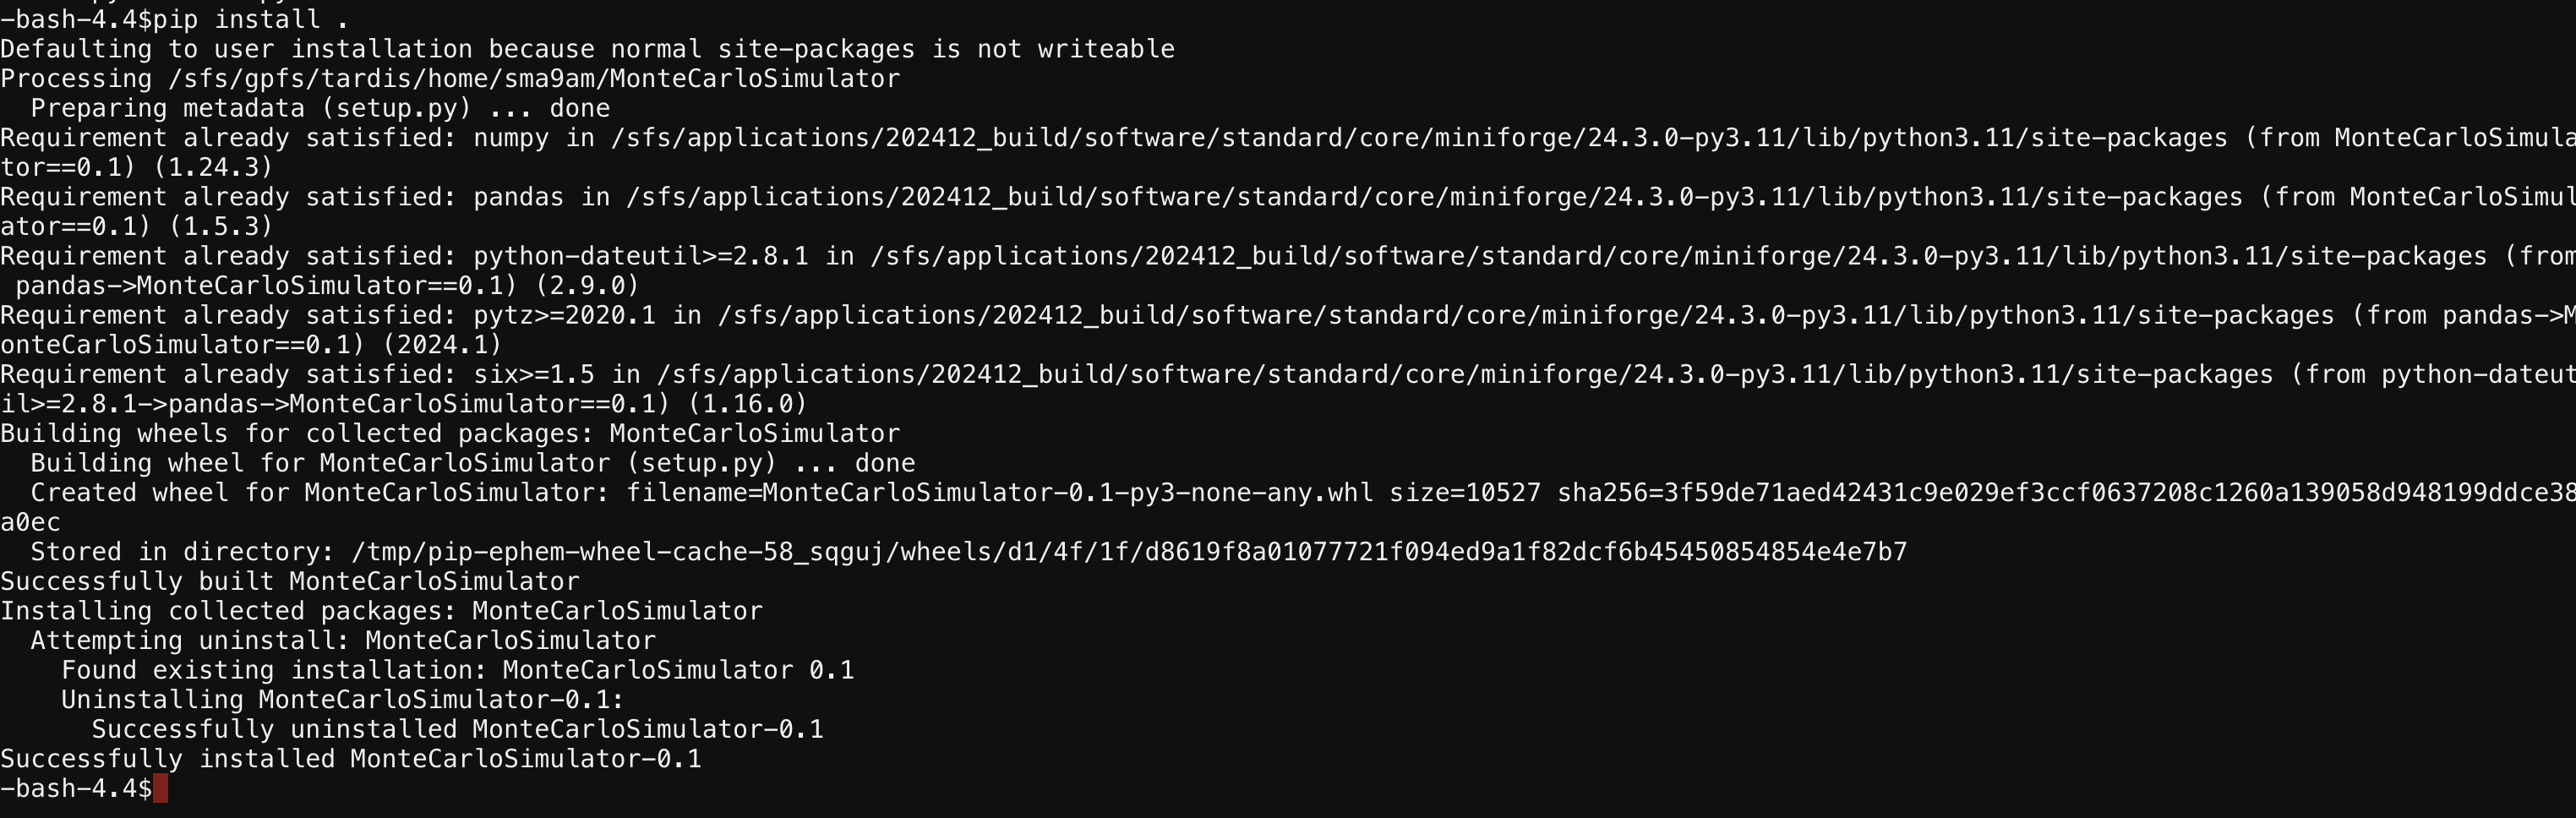

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).